# Project: Data Analysis of European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project, I have selected the European Soccer Database. First I opened the database using DB Browser and performed SQL queries to join tables together that could be used for the analysis. The data was then exported as CSV files.
>
>
> Using the data, I will be answering the following questions
>
>###### i) What is the average number of goals scored over seasons in different leagues?
>
>###### ii) Who dominates the rivalry b/w FC Barcelona & Real Madrid (El Classico)?
>
>###### iii) What is the distribution of BMI of the players?
>
>###### iv) Are more player 'right footed' or 'left footed'?
>
>###### v) Who are the top 10 rated players?
>
>###### vi) Which players show most potential?
>
>###### vii) Who's the oldest and who's the youngest player in the European League?

#### Query to extract files from the database
> The following SQL queries were written in DB Browser to perform joins between tables and get the relevant data
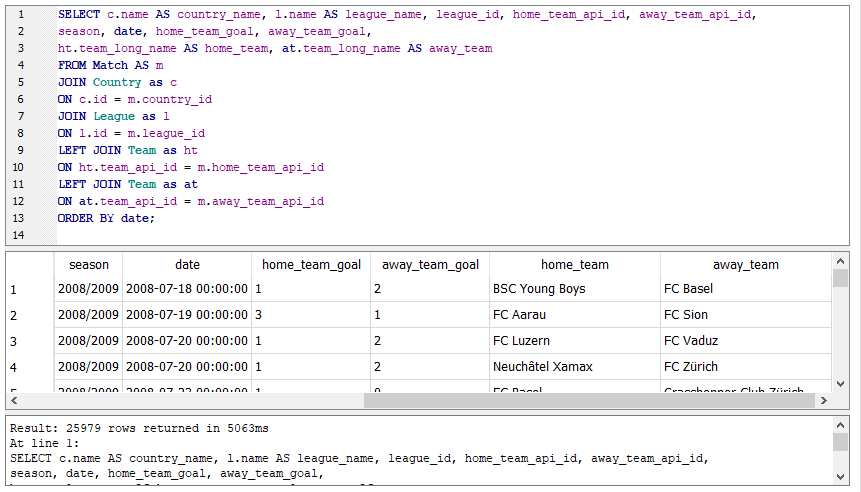
The above query joins the country, match, league and team table together to extract country names from the Country Table, league name, league id, team api id , dates, goals scored by home team and away team from the Match table and so on. 
##### This data was then saved as a csv file called 'match_stats' 

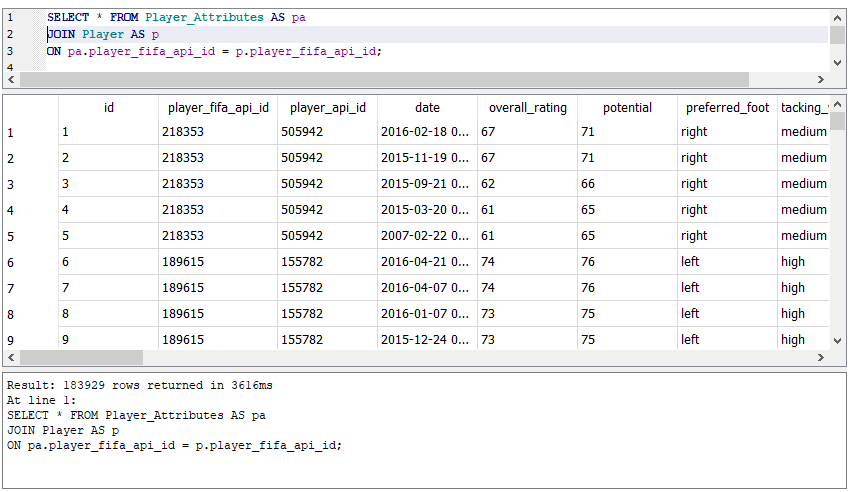
> This SQL query joins the Player Attributes and Players tables together. This was we have the player's names and thier attributes in a single file.
##### This data was saved as a csv file called 'player_attributes'

In [2]:
#import libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

# Read CSV files
df_match_stats = pd.read_csv('match_stats.csv') #match stats for the game
df_player_attributes = pd.read_csv('player_attributes.csv') #player names and attributes


In [3]:
df_match_stats.head() #inspect the head of match_stats dataframe

,country_name,league_name,league_id,home_team_api_id,away_team_api_id,season,date,home_team_goal,away_team_goal,home_team,away_team
0,Switzerland,Switzerland Super League,24558,10192,9931,2008/2009,2008-07-18 00:00:00,1,2,BSC Young Boys,FC Basel
1,Switzerland,Switzerland Super League,24558,9930,10179,2008/2009,2008-07-19 00:00:00,3,1,FC Aarau,FC Sion
2,Switzerland,Switzerland Super League,24558,10199,9824,2008/2009,2008-07-20 00:00:00,1,2,FC Luzern,FC Vaduz
3,Switzerland,Switzerland Super League,24558,7955,10243,2008/2009,2008-07-20 00:00:00,1,2,Neuchâtel Xamax,FC Zürich
4,Switzerland,Switzerland Super League,24558,9931,9956,2008/2009,2008-07-23 00:00:00,1,0,FC Basel,Grasshopper Club Zürich


In [4]:
df_player_attributes.head() #inspect the head of player_attributes dataframe

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_kicking,gk_positioning,gk_reflexes,id.1,player_api_id.1,player_name,player_fifa_api_id.1,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


<a id='wrangling'></a>
## Data Wrangling

> The data has been successfully imported above 

> In this section, the dataframes will be further investigated and cleaned accordingly

In [5]:
#Info about the dataframe
df_match_stats.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_name      25979 non-null  object
 1   league_name       25979 non-null  object
 2   league_id         25979 non-null  int64 
 3   home_team_api_id  25979 non-null  int64 
 4   away_team_api_id  25979 non-null  int64 
 5   season            25979 non-null  object
 6   date              25979 non-null  object
 7   home_team_goal    25979 non-null  int64 
 8   away_team_goal    25979 non-null  int64 
 9   home_team         25979 non-null  object
 10  away_team         25979 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.2+ MB


There are no null values in this dataframe. But there are a few columns that won't be required for the analysis.
As this dataframe will be used to inspect the average number of goals per season and the rivalry b/w two teams, those are the columns that needs to be kept in the dataframe

In [6]:
# drop the columns not needed
df_match_stats.drop(['league_name', 'league_id', 'home_team_api_id','away_team_api_id','date' ], axis=1, inplace=True)  

#inspect the head of the dataframe
df_match_stats.head() 

,country_name,season,home_team_goal,away_team_goal,home_team,away_team
0,Switzerland,2008/2009,1,2,BSC Young Boys,FC Basel
1,Switzerland,2008/2009,3,1,FC Aarau,FC Sion
2,Switzerland,2008/2009,1,2,FC Luzern,FC Vaduz
3,Switzerland,2008/2009,1,2,Neuchâtel Xamax,FC Zürich
4,Switzerland,2008/2009,1,0,FC Basel,Grasshopper Club Zürich


Rearranging the columns for better readability

In [7]:
df_match_stats = df_match_stats[['country_name', 'season', 'home_team', 'away_team', 'home_team_goal','away_team_goal']]

df_match_stats.head()

,country_name,season,home_team,away_team,home_team_goal,away_team_goal
0,Switzerland,2008/2009,BSC Young Boys,FC Basel,1,2
1,Switzerland,2008/2009,FC Aarau,FC Sion,3,1
2,Switzerland,2008/2009,FC Luzern,FC Vaduz,1,2
3,Switzerland,2008/2009,Neuchâtel Xamax,FC Zürich,1,2
4,Switzerland,2008/2009,FC Basel,Grasshopper Club Zürich,1,0


In [8]:
# See the unique values in the dataframe
df_match_stats.nunique() 

country_name       11
season              8
home_team         296
away_team         296
home_team_goal     11
away_team_goal     10
dtype: int64

In [9]:
# Check the number of duplicated 
sum(df_match_stats.duplicated())


117

Dropping the duplicates 

In [10]:
# Drop duplicates 
df_match_stats.drop_duplicates(keep = 'first', inplace = True)

In [11]:
# Check for duplicates
sum(df_match_stats.duplicated())

0

Summary statistics for the dataframe

In [12]:
df_match_stats.describe()

,home_team_goal,away_team_goal
count,25862.000000,25862.000000
mean,1.545781,1.162594
std,1.298426,1.143291
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,9.000000


The following summary statistics is not that useful here. We'll use summary statistics by grouping every season and every country. That would give us a much better insight into the data. But before we do that, let's add a column to our dataframe that contains total goals scored in each match

In [13]:
# Add a new column 'total_goals'
df_match_stats['total_goals'] = df_match_stats.sum(axis=1) 

# Look at the new dataframe
df_match_stats.head() 

,country_name,season,home_team,away_team,home_team_goal,away_team_goal,total_goals
0,Switzerland,2008/2009,BSC Young Boys,FC Basel,1,2,3
1,Switzerland,2008/2009,FC Aarau,FC Sion,3,1,4
2,Switzerland,2008/2009,FC Luzern,FC Vaduz,1,2,3
3,Switzerland,2008/2009,Neuchâtel Xamax,FC Zürich,1,2,3
4,Switzerland,2008/2009,FC Basel,Grasshopper Club Zürich,1,0,1


In [14]:
# Look at summary statistics for each season and country 
df_match_stats.groupby(['country_name', 'season']).describe()

home_team_goal                                          \
                                count      mean       std  min  25%  50%  75%   
country_name season                                                             
Belgium      2008/2009          306.0  1.630719  1.271724  0.0  1.0  1.0  2.0   
             2009/2010          210.0  1.466667  1.102990  0.0  1.0  1.0  2.0   
             2010/2011          240.0  1.591667  1.402304  0.0  1.0  1.0  2.0   
             2011/2012          240.0  1.754167  1.375968  0.0  1.0  2.0  3.0   
             2012/2013          240.0  1.562500  1.266006  0.0  1.0  1.0  2.0   
...                               ...       ...       ...  ...  ...  ...  ...   
Switzerland  2011/2012          158.0  1.449367  1.380240  0.0  0.0  1.0  2.0   
             2012/2013          176.0  1.517045  1.343660  0.0  0.0  1.0  2.0   
             2013/2014          176.0  1.625000  1.320714  0.0  1.0  1.0  3.0   
             2014/2015          174.0  1.637931  1.418681  0.0  0.0  1.0  3.0   
             2015/2016          173.0  1.803468  1.396253  0.0  1.0  2.0  3.0   

                            away_team_goal            ...            \
                        max          count      mean  ...  75%  max   
country_name season                                   ...             
Belgium      2008/2009  7.0          306.0  1.163399  ...  2.0  6.0   
             2009/2010  5.0          210.0  1.223810  ...  2.0  5.0   
             2010/2011  7.0          240.0  1.054167  ...  2.0  5.0   
             2011/2012  6.0          240.0  1.125000  ...  2.0  5.0   
             2012/2013  6.0          240.0  1.366667  ...  2.0  7.0   
...                     ...            ...       ...  ...  ...  ...   
Switzerland  2011/2012  6.0          158.0  1.189873  ...  2.0  5.0   
             2012/2013  6.0          176.0  1.068182  ...  2.0  4.0   
             2013/2014  5.0          176.0  1.295455  ...  2.0  5.0   
             2014/2015  6.0          174.0  1.287356  ...  2.0  6.0   
             2015/2016  7.0          173.0  1.375723  ...  2.0  7.0   

                       total_goals                                           \
                             count      mean       std  min   25%  50%  75%   
country_name season                                                           
Belgium      2008/2009       306.0  2.794118  1.599210  0.0  2.00  3.0  4.0   
             2009/2010       210.0  2.690476  1.468784  0.0  2.00  2.0  4.0   
             2010/2011       240.0  2.645833  1.657866  0.0  1.00  2.0  4.0   
             2011/2012       240.0  2.879167  1.803641  0.0  2.00  3.0  4.0   
             2012/2013       240.0  2.929167  1.733012  0.0  2.00  3.0  4.0   
...                            ...       ...       ...  ...   ...  ...  ...   
Switzerland  2011/2012       158.0  2.639241  1.705063  0.0  1.00  2.0  4.0   
             2012/2013       176.0  2.585227  1.579732  0.0  1.75  2.0  4.0   
             2013/2014       176.0  2.920455  1.629875  0.0  2.00  3.0  4.0   
             2014/2015       174.0  2.925287  1.786314  0.0  1.25  3.0  4.0   
             2015/2016       173.0  3.179191  1.813139  0.0  2.00  3.0  4.0   

                             
                        max  
country_name season          
Belgium      2008/2009  8.0  
             2009/2010  7.0  
             2010/2011  8.0  
             2011/2012  9.0  
             2012/2013  8.0  
...                     ...  
Switzerland  2011/2012  9.0  
             2012/2013  8.0  
             2013/2014  8.0  
             2014/2015  8.0  
             2015/2016  9.0  

[88 rows x 24 columns]

Now we can see how many matches were played in each season in each league and other summary statistics too. We'll use this cleaned dataframe for analyzing how many goals on average are scored per league per season and the rivalry between FC Barcelona and Real Madrid

##### Cleaning the second csv file

In [15]:
df_player_attributes.head() #inspect the head of the dataframe

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_kicking,gk_positioning,gk_reflexes,id.1,player_api_id.1,player_name,player_fifa_api_id.1,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [16]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183929 entries, 0 to 183928
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    183929 non-null  int64  
 1   player_fifa_api_id    183929 non-null  int64  
 2   player_api_id         183929 non-null  int64  
 3   date                  183929 non-null  object 
 4   overall_rating        183142 non-null  float64
 5   potential             183142 non-null  float64
 6   preferred_foot        183142 non-null  object 
 7   attacking_work_rate   180748 non-null  object 
 8   defensive_work_rate   183142 non-null  object 
 9   crossing              183142 non-null  float64
 10  finishing             183142 non-null  float64
 11  heading_accuracy      183142 non-null  float64
 12  short_passing         183142 non-null  float64
 13  volleys               181265 non-null  float64
 14  dribbling             183142 non-null  float64
 15  

We have 49 columns in this dataframe. Lets first drop all the columns not needed. 
For our purpose, we only need overall_rating, potential, preferred foot, player_name, birthday , height and weight columns

In [17]:
# using numpy np.r_ to select the columns
df_player_attributes = df_player_attributes.iloc[:,np.r_[4:7,44,46:49]]


In [18]:
#inspect the head of the new dataframe
df_player_attributes.head()

,overall_rating,potential,preferred_foot,player_name,birthday,height,weight
0,67.0,71.0,right,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,67.0,71.0,right,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,62.0,66.0,right,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,61.0,65.0,right,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,61.0,65.0,right,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


We got the rows that we wanted but we see that the player name has duplicates, the reason for this is that the player attributes were recorded every season with the top one being the most recent. We can check that in the raw dataframe above. 
By dropping the duplicate names and only keeping the first name that appears would give us the most recent player attributes 

In [19]:
#drop duplicates only keeping first name that appears
df_player_attributes.drop_duplicates(subset ="player_name", keep = 'first', inplace = True) 

In [20]:
#inspect the dataframe
df_player_attributes.head(10)

,overall_rating,potential,preferred_foot,player_name,birthday,height,weight
0,67.0,71.0,right,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
5,74.0,76.0,left,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
38,65.0,67.0,right,Aaron Doran,1991-05-13 00:00:00,170.18,163
64,69.0,69.0,right,Aaron Galindo,1982-05-08 00:00:00,182.88,198
87,70.0,70.0,right,Aaron Hughes,1979-11-08 00:00:00,182.88,154
112,77.0,77.0,left,Aaron Hunt,1986-09-04 00:00:00,182.88,161
139,61.0,74.0,right,Aaron Kuhl,1996-01-30 00:00:00,172.72,146
146,77.0,77.0,right,Aaron Lennon,1987-04-16 00:00:00,165.10,139
172,48.0,56.0,right,Aaron Lennox,1993-02-19 00:00:00,190.50,181
179,69.0,69.0,left,Aaron Meijers,1987-10-28 00:00:00,175.26,170


In [21]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10848 entries, 0 to 183919
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall_rating  10848 non-null  float64
 1   potential       10848 non-null  float64
 2   preferred_foot  10848 non-null  object 
 3   player_name     10848 non-null  object 
 4   birthday        10848 non-null  object 
 5   height          10848 non-null  float64
 6   weight          10848 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 678.0+ KB


In [22]:
df_player_attributes.nunique()

overall_rating       48
potential            44
preferred_foot        2
player_name       10848
birthday           5707
height               20
weight               50
dtype: int64

In [23]:
sum(df_player_attributes.duplicated())

0

There are no duplicates in the dataframe. And we don't have any null values either. 

Create a new column for Body Mass Index (BMI) for each player. The formula for Body Mass Index is as follows:-

$ BMI = kg/m^2 $

In the dataframe, the height is in cms and weight is in pounds. 

Creating two new columns for weight in kg and height in meteres. 
The formula is as follows:-

$ kg = pounds * 0.4535 $ 
and 
$ meter = cm/100 $

In [24]:
# Creating new columns for kg and metres and bmi

df_player_attributes['height_meteres'] = df_player_attributes['height'] /100 
df_player_attributes['weight_kg'] = df_player_attributes['weight']*0.4535
df_player_attributes['bmi'] = df_player_attributes['weight_kg'] / (df_player_attributes['height_meteres']*df_player_attributes['height_meteres'])

# Inspect the head of the dataframe
df_player_attributes.head()

,overall_rating,potential,preferred_foot,player_name,birthday,height,weight,height_meteres,weight_kg,bmi
0,67.0,71.0,right,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,1.8288,84.8045,25.356334
5,74.0,76.0,left,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,1.7018,66.2110,22.861941
38,65.0,67.0,right,Aaron Doran,1991-05-13 00:00:00,170.18,163,1.7018,73.9205,25.523948
64,69.0,69.0,right,Aaron Galindo,1982-05-08 00:00:00,182.88,198,1.8288,89.7930,26.847884
87,70.0,70.0,right,Aaron Hughes,1979-11-08 00:00:00,182.88,154,1.8288,69.8390,20.881687


Rearrange the columns

In [25]:
df_player_attributes = df_player_attributes[['player_name', 'birthday', 'overall_rating', 
                                             'potential', 'preferred_foot', 'height', 'height_meteres',
                                             'weight', 'weight_kg', 'bmi']]
df_player_attributes.head()

,player_name,birthday,overall_rating,potential,preferred_foot,height,height_meteres,weight,weight_kg,bmi
0,Aaron Appindangoye,1992-02-29 00:00:00,67.0,71.0,right,182.88,1.8288,187,84.8045,25.356334
5,Aaron Cresswell,1989-12-15 00:00:00,74.0,76.0,left,170.18,1.7018,146,66.2110,22.861941
38,Aaron Doran,1991-05-13 00:00:00,65.0,67.0,right,170.18,1.7018,163,73.9205,25.523948
64,Aaron Galindo,1982-05-08 00:00:00,69.0,69.0,right,182.88,1.8288,198,89.7930,26.847884
87,Aaron Hughes,1979-11-08 00:00:00,70.0,70.0,right,182.88,1.8288,154,69.8390,20.881687


Converting 'birthday' to a datetime object

In [26]:
df_player_attributes['birthday'] = pd.to_datetime(df_player_attributes['birthday']) #using pandas to_datetime function

In [27]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10848 entries, 0 to 183919
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   player_name     10848 non-null  object        
 1   birthday        10848 non-null  datetime64[ns]
 2   overall_rating  10848 non-null  float64       
 3   potential       10848 non-null  float64       
 4   preferred_foot  10848 non-null  object        
 5   height          10848 non-null  float64       
 6   height_meteres  10848 non-null  float64       
 7   weight          10848 non-null  int64         
 8   weight_kg       10848 non-null  float64       
 9   bmi             10848 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 932.2+ KB


Now we have birthday as a datetime object. Thus this concludes cleaning of our data.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
##### What is the average number of goals scored over seasons in different leagues?

In [28]:
# Group By country and season to see the average number of goals scored each season
df_match_stats.groupby(['country_name','season'])['total_goals'].mean()

country_name  season   
Belgium       2008/2009    2.794118
              2009/2010    2.690476
              2010/2011    2.645833
              2011/2012    2.879167
              2012/2013    2.929167
                             ...   
Switzerland   2011/2012    2.639241
              2012/2013    2.585227
              2013/2014    2.920455
              2014/2015    2.925287
              2015/2016    3.179191
Name: total_goals, Length: 88, dtype: float64

For our analysis we will be using the data from the five major leagues which are LA Liga (Spain), Serie A (Italy), France Ligue 1 (France), English Premiere League (England), Bundesliga (Germany)

In [29]:
#See the unique names of country in country_name columns
df_match_stats.country_name.unique()

array(['Switzerland', 'Poland', 'France', 'Scotland', 'Germany',
       'Belgium', 'England', 'Portugal', 'Netherlands', 'Italy', 'Spain'],
      dtype=object)

In [30]:
# Create a dataframe with only Spain
df_match_stats_spa = df_match_stats[df_match_stats['country_name'] == 'Spain']

# Group the dataframe by season and select the mean total goals scored
df_spa = df_match_stats_spa.groupby('season')['total_goals'].mean()

In [31]:
# Create a dataframe with only Italy
df_match_stats_ita = df_match_stats[df_match_stats['country_name'] == 'Italy']

# Group the dataframe by season and select the mean total goals scored
df_ita = df_match_stats_ita.groupby('season')['total_goals'].mean()

In [32]:
# Create a dataframe with only France
df_match_stats_fra = df_match_stats[df_match_stats['country_name'] == 'France']

# Group the dataframe by season and select the mean total goals scored
df_fra = df_match_stats_fra.groupby('season')['total_goals'].mean()

In [33]:
# Create a dataframe with only England
df_match_stats_eng = df_match_stats[df_match_stats['country_name'] == 'England']

# Group the dataframe by season and select the mean total goals scored
df_eng = df_match_stats_eng.groupby('season')['total_goals'].mean()

In [34]:
# Create a dataframe with only Germany
df_match_stats_ger = df_match_stats[df_match_stats['country_name'] == 'Germany']

# Group the dataframe by season and select the mean total goals scored
df_ger = df_match_stats_ger.groupby('season')['total_goals'].mean()

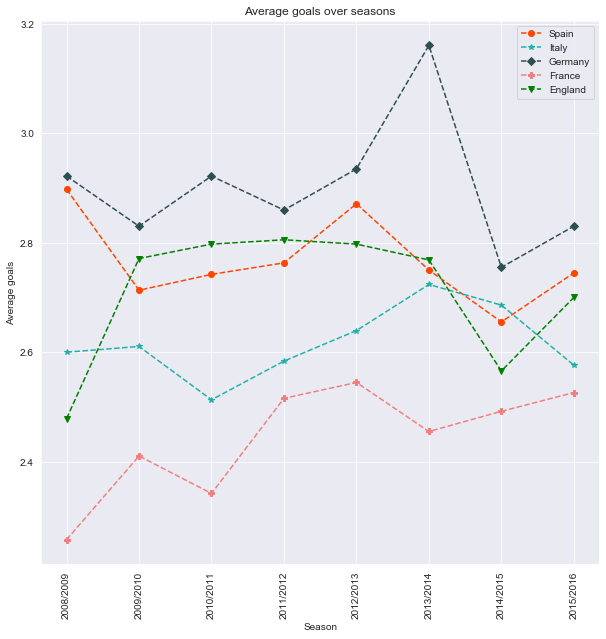

In [35]:
sns.set_style('darkgrid')  # Set background style
legend = ['Spain','Italy','Germany','France','England']  # Add a list containing country names

plt.figure(figsize=(10,10))

plt.plot(df_spa, linestyle='--', color ='orangered', marker = 'o')
plt.plot(df_ita, linestyle='--', color ='lightseagreen', marker = '*')
plt.plot(df_ger, linestyle='--', color = 'darkslategrey', marker = 'D')
plt.plot(df_fra, linestyle='--', color = 'lightcoral', marker = 'P')
plt.plot(df_eng, linestyle='--', color = 'green', marker = 'v')

plt.title('Average goals over seasons')
plt.xlabel('Season')
plt.ylabel('Average goals')

plt.legend(legend)
plt.xticks(rotation = 90)

plt.show()

We can see that over 8 seasons, German League dominates the average goals scored each season with Spanish league coming close second. 

In the season of 2013/2014 there was a huge spike in average in german league with more than 3.1 goals while for 3 other leagues it was close to 2.7

The least number of goals per season are scored in French league of the 5 leagues compared 

### Research Question 2 
##### Who dominates the rivalry b/w FC Barcelona & Real Madrid (El Classico)?

For this we will perform some operations on data frame to select only the rows and columns where the home team or the away team is either FC Barcelona or Real Madrid and vice versa. We'll then save the data collected in a new dataframe 

In [36]:
df_el_classico = df_match_stats[((df_match_stats['home_team']=='FC Barcelona')& 
                                 (df_match_stats['away_team']=='Real Madrid CF')) | 
                                ((df_match_stats['away_team']=='FC Barcelona')& 
                                 (df_match_stats['home_team']=='Real Madrid CF')) ]

In [37]:
#Inspect the new dataframe
df_el_classico

,country_name,season,home_team,away_team,home_team_goal,away_team_goal,total_goals
1470,Spain,2008/2009,FC Barcelona,Real Madrid CF,2,0,2
2958,Spain,2008/2009,Real Madrid CF,FC Barcelona,2,6,8
4599,Spain,2009/2010,FC Barcelona,Real Madrid CF,1,0,1
6072,Spain,2009/2010,Real Madrid CF,FC Barcelona,0,2,2
7909,Spain,2010/2011,FC Barcelona,Real Madrid CF,5,0,5
9318,Spain,2010/2011,Real Madrid CF,FC Barcelona,1,1,2
11235,Spain,2011/2012,Real Madrid CF,FC Barcelona,1,3,4
12679,Spain,2011/2012,FC Barcelona,Real Madrid CF,1,2,3
13750,Spain,2012/2013,FC Barcelona,Real Madrid CF,2,2,4
15326,Spain,2012/2013,Real Madrid CF,FC Barcelona,2,1,3


Now we'll add 3 new columns to this dataframe which will contain the bool values for the winner in home team, away team, and match draws

In [38]:
# Create a column home_team_winner with boolean values which will be true if home team wins
df_el_classico['home_team_winner'] = df_el_classico['home_team_goal'] > df_el_classico['away_team_goal']

# Create a column away_team_winner with boolean values which will be true if away team wins
df_el_classico['away_team_winner'] = df_el_classico['home_team_goal'] < df_el_classico['away_team_goal']

# Create a column away_team_winner with boolean values which will be true if it is a draw
df_el_classico['match_draw'] = df_el_classico['home_team_goal'] == df_el_classico['away_team_goal']

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [39]:
# Inspect the new dataframe 
df_el_classico.head()

,country_name,season,home_team,away_team,home_team_goal,away_team_goal,total_goals,home_team_winner,away_team_winner,match_draw
1470,Spain,2008/2009,FC Barcelona,Real Madrid CF,2,0,2,True,False,False
2958,Spain,2008/2009,Real Madrid CF,FC Barcelona,2,6,8,False,True,False
4599,Spain,2009/2010,FC Barcelona,Real Madrid CF,1,0,1,True,False,False
6072,Spain,2009/2010,Real Madrid CF,FC Barcelona,0,2,2,False,True,False
7909,Spain,2010/2011,FC Barcelona,Real Madrid CF,5,0,5,True,False,False


In [40]:
#group by home_team and away_team and count number of winners for each team
df_el_classico.groupby(['home_team', 'away_team'])[['home_team_winner','away_team_winner','match_draw']].sum() 

,,home_team_winner,away_team_winner,match_draw
home_team,away_team,,,
FC Barcelona,Real Madrid CF,5.0,2.0,1.0
Real Madrid CF,FC Barcelona,2.0,5.0,1.0


So according to the result above FC Barcelona won 5 times at home and 5 times away and Real Madrid won 2 times at home and 2 times away and 2 matches were draws. 
That gives us a total of 16 matches which is the total number of rows of the dataframe. But since these values look a little suspicious, let's investigate a little further

In [41]:
#Query for when home team is Real Madrid and home team wins i.e Real Madrid wins
rm_home_wins = df_el_classico.query('home_team == "Real Madrid CF"' )['home_team_winner'].sum()
rm_home_wins

2

In [42]:
#Query for when home team is Real Madrid and home team loses i.e Real Madrid loses and Barcelona wins
bar_away_wins = df_el_classico.query('home_team == "Real Madrid CF"' )['away_team_winner'].sum()
bar_away_wins

5

In [43]:
#Query for when home team is Barcelona and home team wins i.e Barcelona wins
bar_home_wins = df_el_classico.query('home_team == "FC Barcelona"' )['home_team_winner'].sum()
bar_home_wins

5

In [44]:
#Query for when home team is Barcelona and home team loses i.e Barcelona loses and Real Madrid wins
rm_away_wins = df_el_classico.query('home_team == "FC Barcelona"' )['away_team_winner'].sum()
rm_away_wins

2

In [45]:
#Total number of draws
match_draw = df_el_classico.match_draw.sum()
match_draw

2

Since the values are same. This concludes that the values that we saw earlier in the groupby table were correct

In [46]:
# Total matches won by Barcelona
bar_wins = bar_home_wins + bar_away_wins
bar_wins

10

In [47]:
# Total matches won by Real Madrid
rm_wins = rm_home_wins + rm_away_wins
rm_wins

4

Creating a pie chart to see what is the percentage of wins by each team

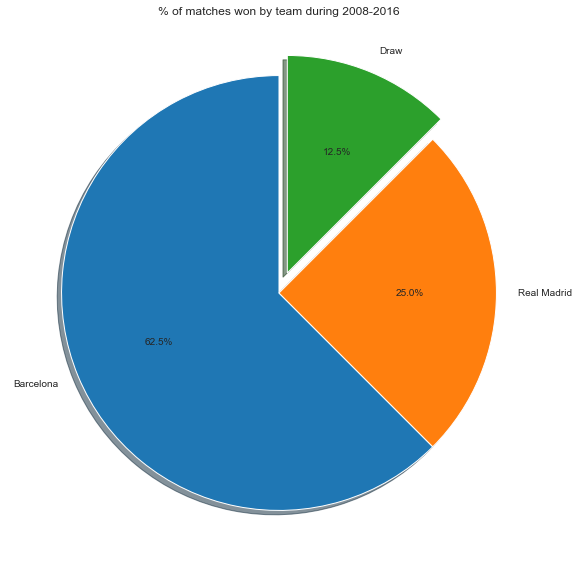

In [48]:
labels = ['Barcelona', 'Real Madrid', 'Draw']
plt.figure(figsize=(10,10))
plt.title('% of matches won by team during 2008-2016')
sizes = [bar_wins, rm_wins, match_draw]
explode = (0, 0, 0.1)
plt.pie(sizes,explode = explode,  labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

From this pie chart it is clear that in the 8 seasons b/w 2008 and 2016, Barcelona has dominated EL Classico with 62.5% winning percentage compared to Real Madrid who have a winning percantage of 25%

### Research Question 3
##### What is the distribution of BMI of the players?

In [49]:
#Lets look at the head of the dataset of player attributes once more
df_player_attributes.head()

,player_name,birthday,overall_rating,potential,preferred_foot,height,height_meteres,weight,weight_kg,bmi
0,Aaron Appindangoye,1992-02-29,67.0,71.0,right,182.88,1.8288,187,84.8045,25.356334
5,Aaron Cresswell,1989-12-15,74.0,76.0,left,170.18,1.7018,146,66.2110,22.861941
38,Aaron Doran,1991-05-13,65.0,67.0,right,170.18,1.7018,163,73.9205,25.523948
64,Aaron Galindo,1982-05-08,69.0,69.0,right,182.88,1.8288,198,89.7930,26.847884
87,Aaron Hughes,1979-11-08,70.0,70.0,right,182.88,1.8288,154,69.8390,20.881687


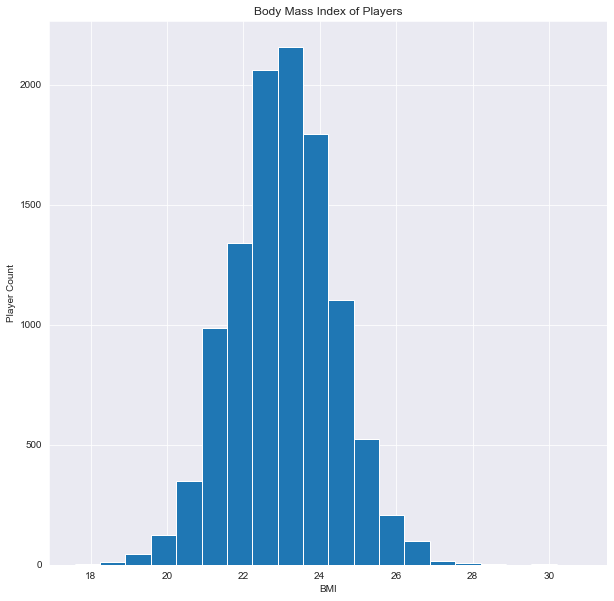

In [50]:
plt.figure(figsize=(10,10))
plt.hist(df_player_attributes['bmi'], bins =20)
plt.xlabel('BMI')
plt.ylabel('Player Count')
plt.title('Body Mass Index of Players')
plt.show()

The BMI shows a normal distribution with most counts b/w 22 and 24 which is considered a healthy weight range. 


### Research Question 4
##### Are more player 'right footed' or 'left footed'?

In [51]:
#Count the number of values for preferred foot
preferred_foot = df_player_attributes['preferred_foot'].value_counts()
preferred_foot

right    8206
left     2642
Name: preferred_foot, dtype: int64

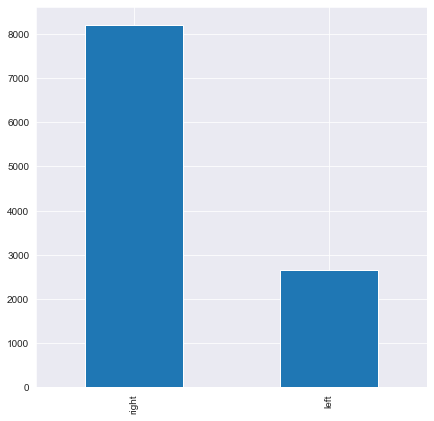

In [52]:
#Plot a bar chart for the preferred foot 
plt.figure(figsize=(7,7))
preferred_foot.plot(kind = 'bar');

There seems to be 3 times more right footed players than left footed players.

This information would become more clear through a pie chart

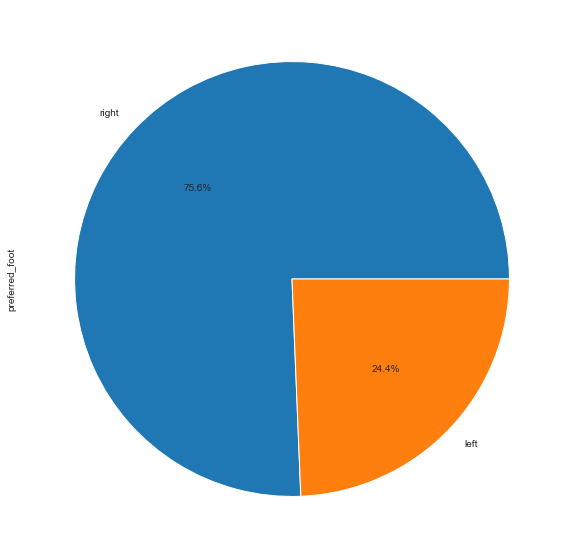

In [53]:
plt.figure(figsize=(10,10))
preferred_foot.plot(kind = 'pie', autopct='%1.1f%%');

Almost 75% players are right footed and only 25% players are left footed  

### Research Question 5
##### Who are the top 10 rated players?

In [54]:
# Using nlargest on overall_rating 
df_player_attributes.nlargest(10,'overall_rating') 

,player_name,birthday,overall_rating,potential,preferred_foot,height,height_meteres,weight,weight_kg,bmi
102482,Lionel Messi,1987-06-24,94.0,94.0,left,170.18,1.7018,159,72.1065,24.897594
33330,Cristiano Ronaldo,1985-02-05,93.0,93.0,right,185.42,1.8542,176,79.8160,23.215434
105983,Luis Suarez,1987-01-24,90.0,90.0,right,182.88,1.8288,187,84.8045,25.356334
109033,Manuel Neuer,1986-03-27,90.0,90.0,right,193.04,1.9304,203,92.0605,24.704650
131439,Neymar,1992-02-05,90.0,94.0,right,175.26,1.7526,150,68.0250,22.146390
16460,Arjen Robben,1984-01-23,89.0,89.0,left,180.34,1.8034,176,79.8160,24.541767
183623,Zlatan Ibrahimovic,1981-10-03,89.0,89.0,right,195.58,1.9558,209,94.7815,24.778482
12773,Andres Iniesta,1984-05-11,88.0,88.0,right,170.18,1.7018,150,68.0250,23.488296
47247,Eden Hazard,1991-01-07,88.0,90.0,right,172.72,1.7272,163,73.9205,24.778764
122441,Mesut Oezil,1988-10-15,88.0,89.0,left,182.88,1.8288,168,76.1880,22.780022


Lionel Messi is top rated with 94 points and Cristiano Ronaldo is just 1 point behind at 93.

### Research Question 6
##### Which players show most potential?

We will look at the top 10 players with most potential

In [55]:
df_player_attributes.nlargest(10,'potential')

,player_name,birthday,overall_rating,potential,preferred_foot,height,height_meteres,weight,weight_kg,bmi
102482,Lionel Messi,1987-06-24,94.0,94.0,left,170.18,1.7018,159,72.1065,24.897594
131439,Neymar,1992-02-05,90.0,94.0,right,175.26,1.7526,150,68.0250,22.146390
33330,Cristiano Ronaldo,1985-02-05,93.0,93.0,right,185.42,1.8542,176,79.8160,23.215434
76430,James Rodriguez,1991-07-12,87.0,93.0,left,180.34,1.8034,165,74.8275,23.007907
140298,Paul Pogba,1993-03-15,86.0,91.0,right,190.50,1.9050,185,83.8975,23.118468
5989,Alen Halilovic,1996-06-18,77.0,90.0,left,170.18,1.7018,143,64.8505,22.392176
29786,Christian Vieri,1973-07-12,76.0,90.0,left,185.42,1.8542,181,82.0835,23.874963
39200,David De Gea,1990-11-07,87.0,90.0,right,193.04,1.9304,181,82.0835,22.027299
47247,Eden Hazard,1991-01-07,88.0,90.0,right,172.72,1.7272,163,73.9205,24.778764
105983,Luis Suarez,1987-01-24,90.0,90.0,right,182.88,1.8288,187,84.8045,25.356334


A few new names but Messi, Ronaldo and Neymar dominate again

### Research Question 6
##### Who's the oldest and who's the youngest player in the European League?

In [56]:
# Select earliest date using min
df_player_attributes['birthday'].min()

Timestamp('1967-01-23 00:00:00')

In [57]:
df_player_attributes.query('birthday == "1967-01-23 00:00:00"' )

,player_name,birthday,overall_rating,potential,preferred_foot,height,height_meteres,weight,weight_kg,bmi
4839,Alberto Fontana,1967-01-23,77.0,78.0,right,185.42,1.8542,161,73.0135,21.236846


In [58]:
# Select latest date using max
df_player_attributes['birthday'].max()

Timestamp('1999-04-24 00:00:00')

In [59]:
df_player_attributes.query('birthday == "1999-04-24 00:00:00"' )

,player_name,birthday,overall_rating,potential,preferred_foot,height,height_meteres,weight,weight_kg,bmi
85952,Jonathan Leko,1999-04-24,65.0,84.0,right,182.88,1.8288,141,63.9435,19.118947


<a id='conclusions'></a>
## Conclusions

> We were able to answer the 7 questions that we started with. The intial step included writing SQL queries to perfom joins on different tables in the Database which was then exported as CSV. 

> During the analysis it was observed that of the 5 top performing leagues, on average most goals are scored in The German League while the least was scored in French League

> In the 8 seasons for which the data was collected, Barcelona has dominated the EL Classico 

> The BMI of the players in the league follows a normal distribution with most players falling under healthy BMI

> Almost 75% of the players in the league are right footed

> Lionel Messi is the top rated player and shows the most potential

> The oldest player for whom the data was recorded was born in 1967 while the youngest was born in 1999


